## Denver Delays Worst Airports

##### Imports

In [1]:
import re
import pandas as pd
import numpy as np
from pygeocoder import Geocoder
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

##### Function `get_airport_code_()` returns 
- airport code
- airport name
- coordinates
- airport name... (a second time)

In [2]:
def get_airport_code(airport_name):
    """function takes in a loosely typed name of city and or airport and 
    returns the airports' three digit code, full name, and coordinates
    It's good to specify the airport if a city has two, such as Dallas Love Field
    and Dallas Fort Worth """
    g = Geocoder.geocode(airport_name)
    proto_code = g.formatted_address.encode('utf-8')    
    airport_code = re.search('\(([^)]+)', proto_code).group(1)
    return [airport_code, str(g.airport), g.coordinates, str(airport_name)]

example:
```
get_airport_code('Ohare')
['ORD', "O'Hare International Airport", (41.9741625, -87.9073214), 'Ohare']
```

##### Adjust the default display size for the map,
static code draws the USA, details get filled in later

In [3]:
# set the display size
plt.rcParams["figure.figsize"] = [60, 40]
# set the map range of coordinates to display mUSA
mUSA = Basemap(projection='mill', llcrnrlat = 22.5, llcrnrlon = -128,
               urcrnrlat = 52.0, urcrnrlon = -67, resolution='l')

##### Emergency variable

In [4]:
# in case the google api prevents too many hits per day and doesnt load the codes, 
# here is the emergency variable, which has the get_airport_code() function returning
# var_for emerg = ['ORD', 'ATL', 'LAX', 'DFW', 'DEN', 'CLT', 'LAS', 'IAH', 'SFO', 'PHX']

##### The `lates` variable is brrowed from webscraped page in a different notebook.
right now the list is copied... it would be better to import it from the other notebook

In [5]:
# import stuff here

In [6]:
lates = ["Chicago's O'Hare International",
 "Atlanta's Hartsfield-Jackson International",
 'Los Angeles International',
 'Dallas/Fort Worth International',
 'Denver International',
 'Charlotte Douglas International',
 "Las Vegas' McCarran International",
 "Houston's George Bush Intercontinental",
 'San Francisco International',
 'Phoenix Sky Harbor International']

In [7]:
lates

["Chicago's O'Hare International",
 "Atlanta's Hartsfield-Jackson International",
 'Los Angeles International',
 'Dallas/Fort Worth International',
 'Denver International',
 'Charlotte Douglas International',
 "Las Vegas' McCarran International",
 "Houston's George Bush Intercontinental",
 'San Francisco International',
 'Phoenix Sky Harbor International']

##### transforming the `lates` strings into useful codes
- codes will be used to create variables

In [8]:
worst_airports = []
for code_needed in lates:
    air_code = get_airport_code(code_needed)
    worst_airports.append(air_code[0])
worst_airports

['ORD', 'ATL', 'LAX', 'DFW', 'DEN', 'CLT', 'LAS', 'IAH', 'SFO', 'PHX']

## Get airport codes

In [10]:
# get_airport_code('denver airport')
# No need to loop through this one since Denver is the origin
DEN = get_airport_code('DIA')
# create two variables with DIA's lattitude and longitude
DENlat, DENlon = DEN[2]

# create two variables inside the mUSA basemap projection
# these two variables will be the origin variables
x_DEN, y_DEN = mUSA(DENlon, DENlat)

# these lists and appends may not be necessary... it looks as if
# the `x_DEN` and `y_DEN` variables are used to fill the pot, and the 
# `olat_dlong` and `olong_dlat` variables don't show up again
# create empty lists for lineplots
olat_dlong = []
olong_dlat = []
# append the origin variables to lineplot lists
olat_dlong.append(x_DEN)
olong_dlat.append(y_DEN)

In [14]:
# print(mUSA(DENlon, DENlat)[0]);
# print(mUSA(DENlon, DENlat)[1])

```
2593760.8151
2135931.09594
```

In [15]:
# print(DEN[0:3]);
# print(DENlat);
# print(DENlon);
# print(x_DEN);
# print(y_DEN)

```['DEN', 'Denver International Airport', (39.8560963, -104.6737376)]
39.8560963
-104.6737376
2593760.8151
2135931.09594```

### Loop combines static text with airport codes 

In [19]:
# this list holds the string concatenations to be used for dictionary values
# 
_list2 = []
for uu in range(len(worst_airports)):
    _list2.append("xTo" + worst_airports[uu])
    _list2.append("yTo" + worst_airports[uu])

    _list2.append("x_" + worst_airports[uu])
    _list2.append("y_" + worst_airports[uu])

    _list2.append(worst_airports[uu] + "lat")
    _list2.append(worst_airports[uu] + "lon")
    _list2.append(worst_airports[uu] + "[2]")


In [20]:
# some slicing to see whats inside
# _list2
# _list2[0:7]
# _list2[7:14][0:3]
# _list2[14:21][-1]
# _list2[21:28]

In [21]:
_list2[28:35]

['xToDEN', 'yToDEN', 'x_DEN', 'y_DEN', 'DENlat', 'DENlon', 'DEN[2]']

##### Playing with number ranges to get specific list elements

In [22]:
x_list = []
for x in xrange(0, 70, 7):
    x_list.append(x)

In [23]:
y_list= []
for y in range(7, 70, 7):
    y_list.append(y)

In [24]:
x_list

[0, 7, 14, 21, 28, 35, 42, 49, 56, 63]

In [25]:
y_list

[7, 14, 21, 28, 35, 42, 49, 56, 63]

In [26]:
_list2[x_list[0]:y_list[0]]

['xToORD', 'yToORD', 'x_ORD', 'y_ORD', 'ORDlat', 'ORDlon', 'ORD[2]']

In [27]:
_list2[x_list[1]:y_list[1]]

['xToATL', 'yToATL', 'x_ATL', 'y_ATL', 'ATLlat', 'ATLlon', 'ATL[2]']

In [28]:
list_for_dict = []
for yuyu in range(len(_list2)//10):
    list_for_dict.append(_list2[x_list[yuyu]:y_list[yuyu]])
list_for_dict

[['xToORD', 'yToORD', 'x_ORD', 'y_ORD', 'ORDlat', 'ORDlon', 'ORD[2]'],
 ['xToATL', 'yToATL', 'x_ATL', 'y_ATL', 'ATLlat', 'ATLlon', 'ATL[2]'],
 ['xToLAX', 'yToLAX', 'x_LAX', 'y_LAX', 'LAXlat', 'LAXlon', 'LAX[2]'],
 ['xToDFW', 'yToDFW', 'x_DFW', 'y_DFW', 'DFWlat', 'DFWlon', 'DFW[2]'],
 ['xToDEN', 'yToDEN', 'x_DEN', 'y_DEN', 'DENlat', 'DENlon', 'DEN[2]'],
 ['xToCLT', 'yToCLT', 'x_CLT', 'y_CLT', 'CLTlat', 'CLTlon', 'CLT[2]'],
 ['xToLAS', 'yToLAS', 'x_LAS', 'y_LAS', 'LASlat', 'LASlon', 'LAS[2]']]

In [29]:
final_zipped_dict = dict(zip(worst_airports, list_for_dict))
final_zipped_dict

{'ATL': ['xToATL', 'yToATL', 'x_ATL', 'y_ATL', 'ATLlat', 'ATLlon', 'ATL[2]'],
 'CLT': ['xToCLT', 'yToCLT', 'x_CLT', 'y_CLT', 'CLTlat', 'CLTlon', 'CLT[2]'],
 'DEN': ['xToDEN', 'yToDEN', 'x_DEN', 'y_DEN', 'DENlat', 'DENlon', 'DEN[2]'],
 'DFW': ['xToDFW', 'yToDFW', 'x_DFW', 'y_DFW', 'DFWlat', 'DFWlon', 'DFW[2]'],
 'LAS': ['xToLAS', 'yToLAS', 'x_LAS', 'y_LAS', 'LASlat', 'LASlon', 'LAS[2]'],
 'LAX': ['xToLAX', 'yToLAX', 'x_LAX', 'y_LAX', 'LAXlat', 'LAXlon', 'LAX[2]'],
 'ORD': ['xToORD', 'yToORD', 'x_ORD', 'y_ORD', 'ORDlat', 'ORDlon', 'ORD[2]']}

In [30]:
# dictionary now contains airport codes to be used for list
# but its name is not very revealing, rename it now to ...
codes_and_var_names = final_zipped_dict

In [31]:
codes_and_var_names.values()[0:2]

[['xToDFW', 'yToDFW', 'x_DFW', 'y_DFW', 'DFWlat', 'DFWlon', 'DFW[2]'],
 ['xToLAX', 'yToLAX', 'x_LAX', 'y_LAX', 'LAXlat', 'LAXlon', 'LAX[2]']]

In [32]:
codes_and_var_names.keys()

['DFW', 'LAX', 'DEN', 'CLT', 'ORD', 'ATL', 'LAS']

In [33]:
range(len(codes_and_var_names.values()))

[0, 1, 2, 3, 4, 5, 6]

In [34]:
codes_and_var_names

{'ATL': ['xToATL', 'yToATL', 'x_ATL', 'y_ATL', 'ATLlat', 'ATLlon', 'ATL[2]'],
 'CLT': ['xToCLT', 'yToCLT', 'x_CLT', 'y_CLT', 'CLTlat', 'CLTlon', 'CLT[2]'],
 'DEN': ['xToDEN', 'yToDEN', 'x_DEN', 'y_DEN', 'DENlat', 'DENlon', 'DEN[2]'],
 'DFW': ['xToDFW', 'yToDFW', 'x_DFW', 'y_DFW', 'DFWlat', 'DFWlon', 'DFW[2]'],
 'LAS': ['xToLAS', 'yToLAS', 'x_LAS', 'y_LAS', 'LASlat', 'LASlon', 'LAS[2]'],
 'LAX': ['xToLAX', 'yToLAX', 'x_LAX', 'y_LAX', 'LAXlat', 'LAXlon', 'LAX[2]'],
 'ORD': ['xToORD', 'yToORD', 'x_ORD', 'y_ORD', 'ORDlat', 'ORDlon', 'ORD[2]']}

In [175]:
# # use a loop to create range(len(codes_and_var_names)) empty lists with names from 
# # the first two items in codes_and_var_names
# storer = []
# for iii in range(len(codes_and_var_names.values())):
#     codes_and_var_names[iii] = []
#     print codes_and_var_names
# #     storer.append(codes_and_var_names[iii])

In [176]:
# storer

In [177]:
# iii

In [207]:
# should i write this previous cell to run for the items in worst_airports or
# should i write out commands that use the ORD_list?

# attempting to write concatenated strings that also are code executers
# these may have to run after I create all the string concatenations
# ORD_list[0].append(ORD_list[2])
# ORD_list[1].append(ORD_list[3])...
# ????


## these may have to run after I create all the string concatenations
# x_ORD, y_ORD = mUSA(ORDlon, ORDlat)...
# ORD_list[2], ORD_list[3] = mUSA(ORD_list[5], ORD_list[4])

# xToORD.append(x_ORD)
# yToORD.append(y_ORD)...
# ORD_list[0].append(ORD_list[2])
# ORD_list[1].append(ORD_list[3])


In [35]:
# *****
# Seattle Tacoma International


SEA = get_airport_code('Seattle Tacoma International Airport')

xToSEA = []
yToSEA = []
x_SEA, y_SEA = mUSA(DENlon, DENlat)
xToSEA.append(x_SEA)
yToSEA.append(y_SEA)

SEAlat, SEAlon = SEA[2]
x_SEA, y_SEA = mUSA(SEAlon, SEAlat)
xToSEA.append(x_SEA)
yToSEA.append(y_SEA)

In [36]:
print(SEA[0:3]);
print(SEA[2])

['SEA', 'Seattle-Tacoma International Airport', (47.4502499, -122.3088165)]
(47.4502499, -122.3088165)


In [37]:
# xToSEA[x_SEA]
xToSEA

[2593760.815099486, 632830.4338135512]

In [38]:
yToSEA

[2135931.09593892, 3166771.4578792555]

In [39]:
SEA_triangle_coord = (x_SEA, y_SEA)
denver_to_seattle = (xToSEA, yToSEA)

In [40]:
SEA_triangle_coord

(632830.4338135512, 3166771.4578792555)

In [41]:
denver_to_seattle

([2593760.815099486, 632830.4338135512],
 [2135931.09593892, 3166771.4578792555])

In [42]:
# *****
# Ronald Reagan International
DCA = get_airport_code('DCA')
xToDCA = []
yToDCA = []

x_DCA, y_DCA = mUSA(DENlon, DENlat)
xToDCA.append(x_DCA)
yToDCA.append(y_DCA)

DCAlat, DCAlon = DCA[2]
x_DCA, y_DCA = mUSA(DCAlon, DCAlat)
xToDCA.append(x_DCA)
yToDCA.append(y_DCA)

In [93]:
# mUSA(DCAlon, DCAlat)
mUSA(DCA[2][0], DCA[2][1])

(18553002.87843292, -13497371.024096765)

In [86]:
xToDCA

[2593760.815099486, 5666465.051933957]

In [94]:
x_DCA

5666465.051933957

In [95]:
y_DCA

2004907.6332323821

In [ ]:
# mark Ronald Reagan International (destination3 with red triangle. draw line by providing lineplot lists
# plot a location
mUSA.plot(x_DCA, y_DCA, 'r^', markersize=40)
# plot a line between locations
mUSA.plot(xToDCA, yToDCA, color='g', linewidth=3, label='flight')

In [ ]:
for aq in fewf:
#     mUSA.plot(xToDCA, yToDCA, color='g', linewidth=3, label='flight')
    mUSA.plot(xToDCA, yToDCA, color='g', linewidth=3, label='flight')

In [61]:
# mark (origin) with a cyan star
mUSA.plot(x_DEN, y_DEN, 'c*', markersize=60)

for tweedle in codes_and_var_names.values()[0:2]:
    
    mUSA.plot(float(codes_and_var_names.values()[0:2][0][2]), float(codes_and_var_names.values()[0:2][0][3)], 'r^', markersize=40)
    
    mUSA.plot((float), float(codes_and_var_names.values()[0:2][0][1]), color='g', linewidth=3)

# Draw the macro details
mUSA.drawcoastlines()
mUSA.drawcountries(linewidth=2)
mUSA.drawstates(color='w')
mUSA.bluemarble(scale=0.75)
plt.show()
plt.savefig('usa_flights.svg')

SyntaxError: invalid syntax (<ipython-input-61-344a6764c97b>, line 6)

In [44]:
# useful data lists
xToDCA


[2593760.815099486, 5666465.051933957]

In [46]:
codes_and_var_names

{'ATL': ['xToATL', 'yToATL', 'x_ATL', 'y_ATL', 'ATLlat', 'ATLlon', 'ATL[2]'],
 'CLT': ['xToCLT', 'yToCLT', 'x_CLT', 'y_CLT', 'CLTlat', 'CLTlon', 'CLT[2]'],
 'DEN': ['xToDEN', 'yToDEN', 'x_DEN', 'y_DEN', 'DENlat', 'DENlon', 'DEN[2]'],
 'DFW': ['xToDFW', 'yToDFW', 'x_DFW', 'y_DFW', 'DFWlat', 'DFWlon', 'DFW[2]'],
 'LAS': ['xToLAS', 'yToLAS', 'x_LAS', 'y_LAS', 'LASlat', 'LASlon', 'LAS[2]'],
 'LAX': ['xToLAX', 'yToLAX', 'x_LAX', 'y_LAX', 'LAXlat', 'LAXlon', 'LAX[2]'],
 'ORD': ['xToORD', 'yToORD', 'x_ORD', 'y_ORD', 'ORDlat', 'ORDlon', 'ORD[2]']}

In [47]:
xToDCA

[2593760.815099486, 5666465.051933957]

In [48]:
x_DCA

5666465.051933957

In [49]:
y_DCA

2004907.6332323821

In [50]:
DCAlat

38.851242

In [51]:
DCAlon

-77.04023149999999

In [52]:
DCA[2]

(38.851242, -77.04023149999999)

In [53]:
# ORD[2]
x_ORD, y_ORD = mUSA(DENlon, DENlat)

In [54]:
x_ToORD

NameError: name 'x_ToORD' is not defined

In [55]:
codes_and_var_names.values()[0:2]

[['xToDFW', 'yToDFW', 'x_DFW', 'y_DFW', 'DFWlat', 'DFWlon', 'DFW[2]'],
 ['xToLAX', 'yToLAX', 'x_LAX', 'y_LAX', 'LAXlat', 'LAXlon', 'LAX[2]']]

In [56]:
codes_and_var_names.values()[0:2][0][1]

'yToDFW'

In [75]:
codes_and_var_names.values()[2][2]

'x_DEN'

In [76]:
codes_and_var_names.values()[2][3]

'y_DEN'

In [85]:
# mark DENVER (origin) with a cyan star
mUSA.plot(x_DEN, y_DEN, 'c*', markersize=60)


# mark Seattle Tacoma (destination) with green triangle
# draw line by providing lineplot lists
mUSA.plot(x_SEA, y_SEA, 'r^', markersize=40)
mUSA.plot(xToSEA, yToSEA, color='g', linewidth=3, label='flight')

# Draw the macro details
mUSA.drawcoastlines()
mUSA.drawcountries(linewidth=2)
mUSA.drawstates(color='w')
mUSA.bluemarble(scale=0.75)
plt.show()
plt.savefig('usa_flights.svg')

ValueError: could not convert string to float: y_DEN

/Users/jg/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3267: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


ValueError: could not convert string to float: x_DFW

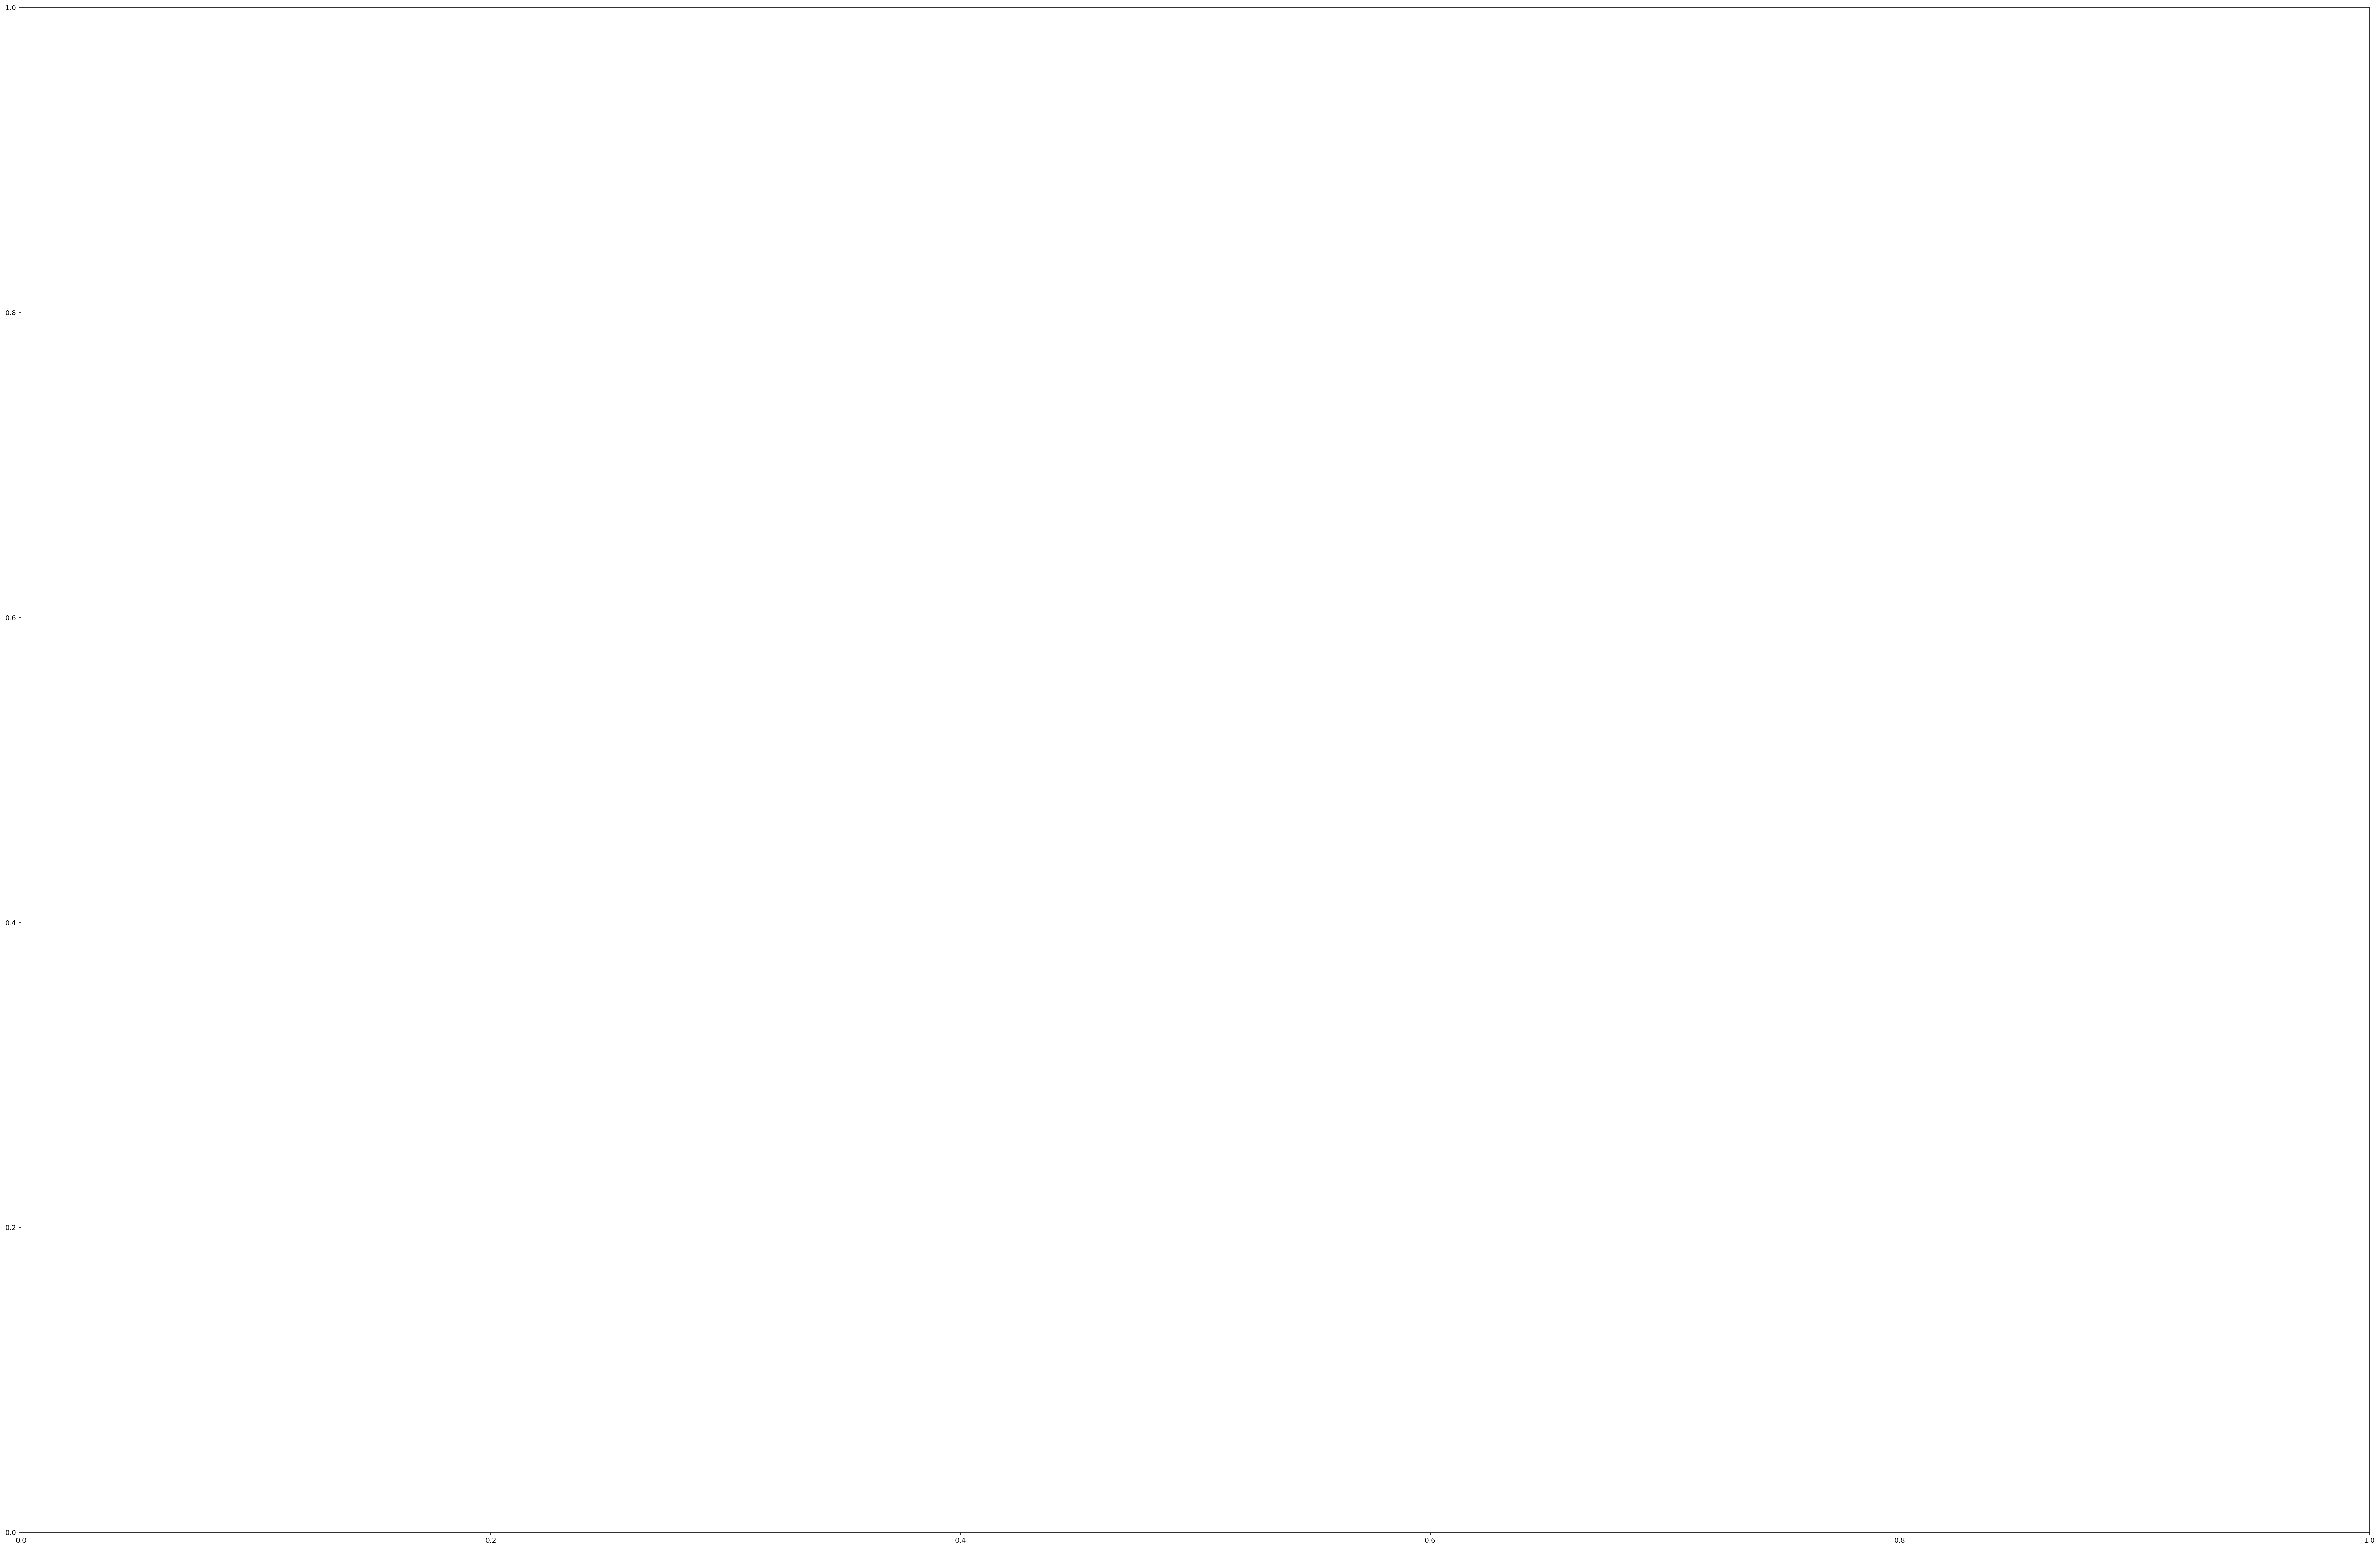

In [57]:
# loop through destinations green lines
# loop through destination red markers
for tweedle in codes_and_var_names.values()[0:2]:
    
    mUSA.plot(codes_and_var_names.values()[0:2][0][2], codes_and_var_names.values()[0:2][0][3], 'r^', markersize=40)
    
    mUSA.plot(codes_and_var_names.values()[0:2][0][0], codes_and_var_names.values()[0:2][0][1], color='g', linewidth=3, label='flight')

In [62]:
codes_and_var_names.values()[0:2][0][2]

'x_DFW'

In [224]:
x

[102099.1335681957, 157552.01737396457, 177111.19576064142]

In [225]:
y

[217807.35036251508, 219751.31895790156, 47852.66081843153]

/Users/jg/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/jg/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


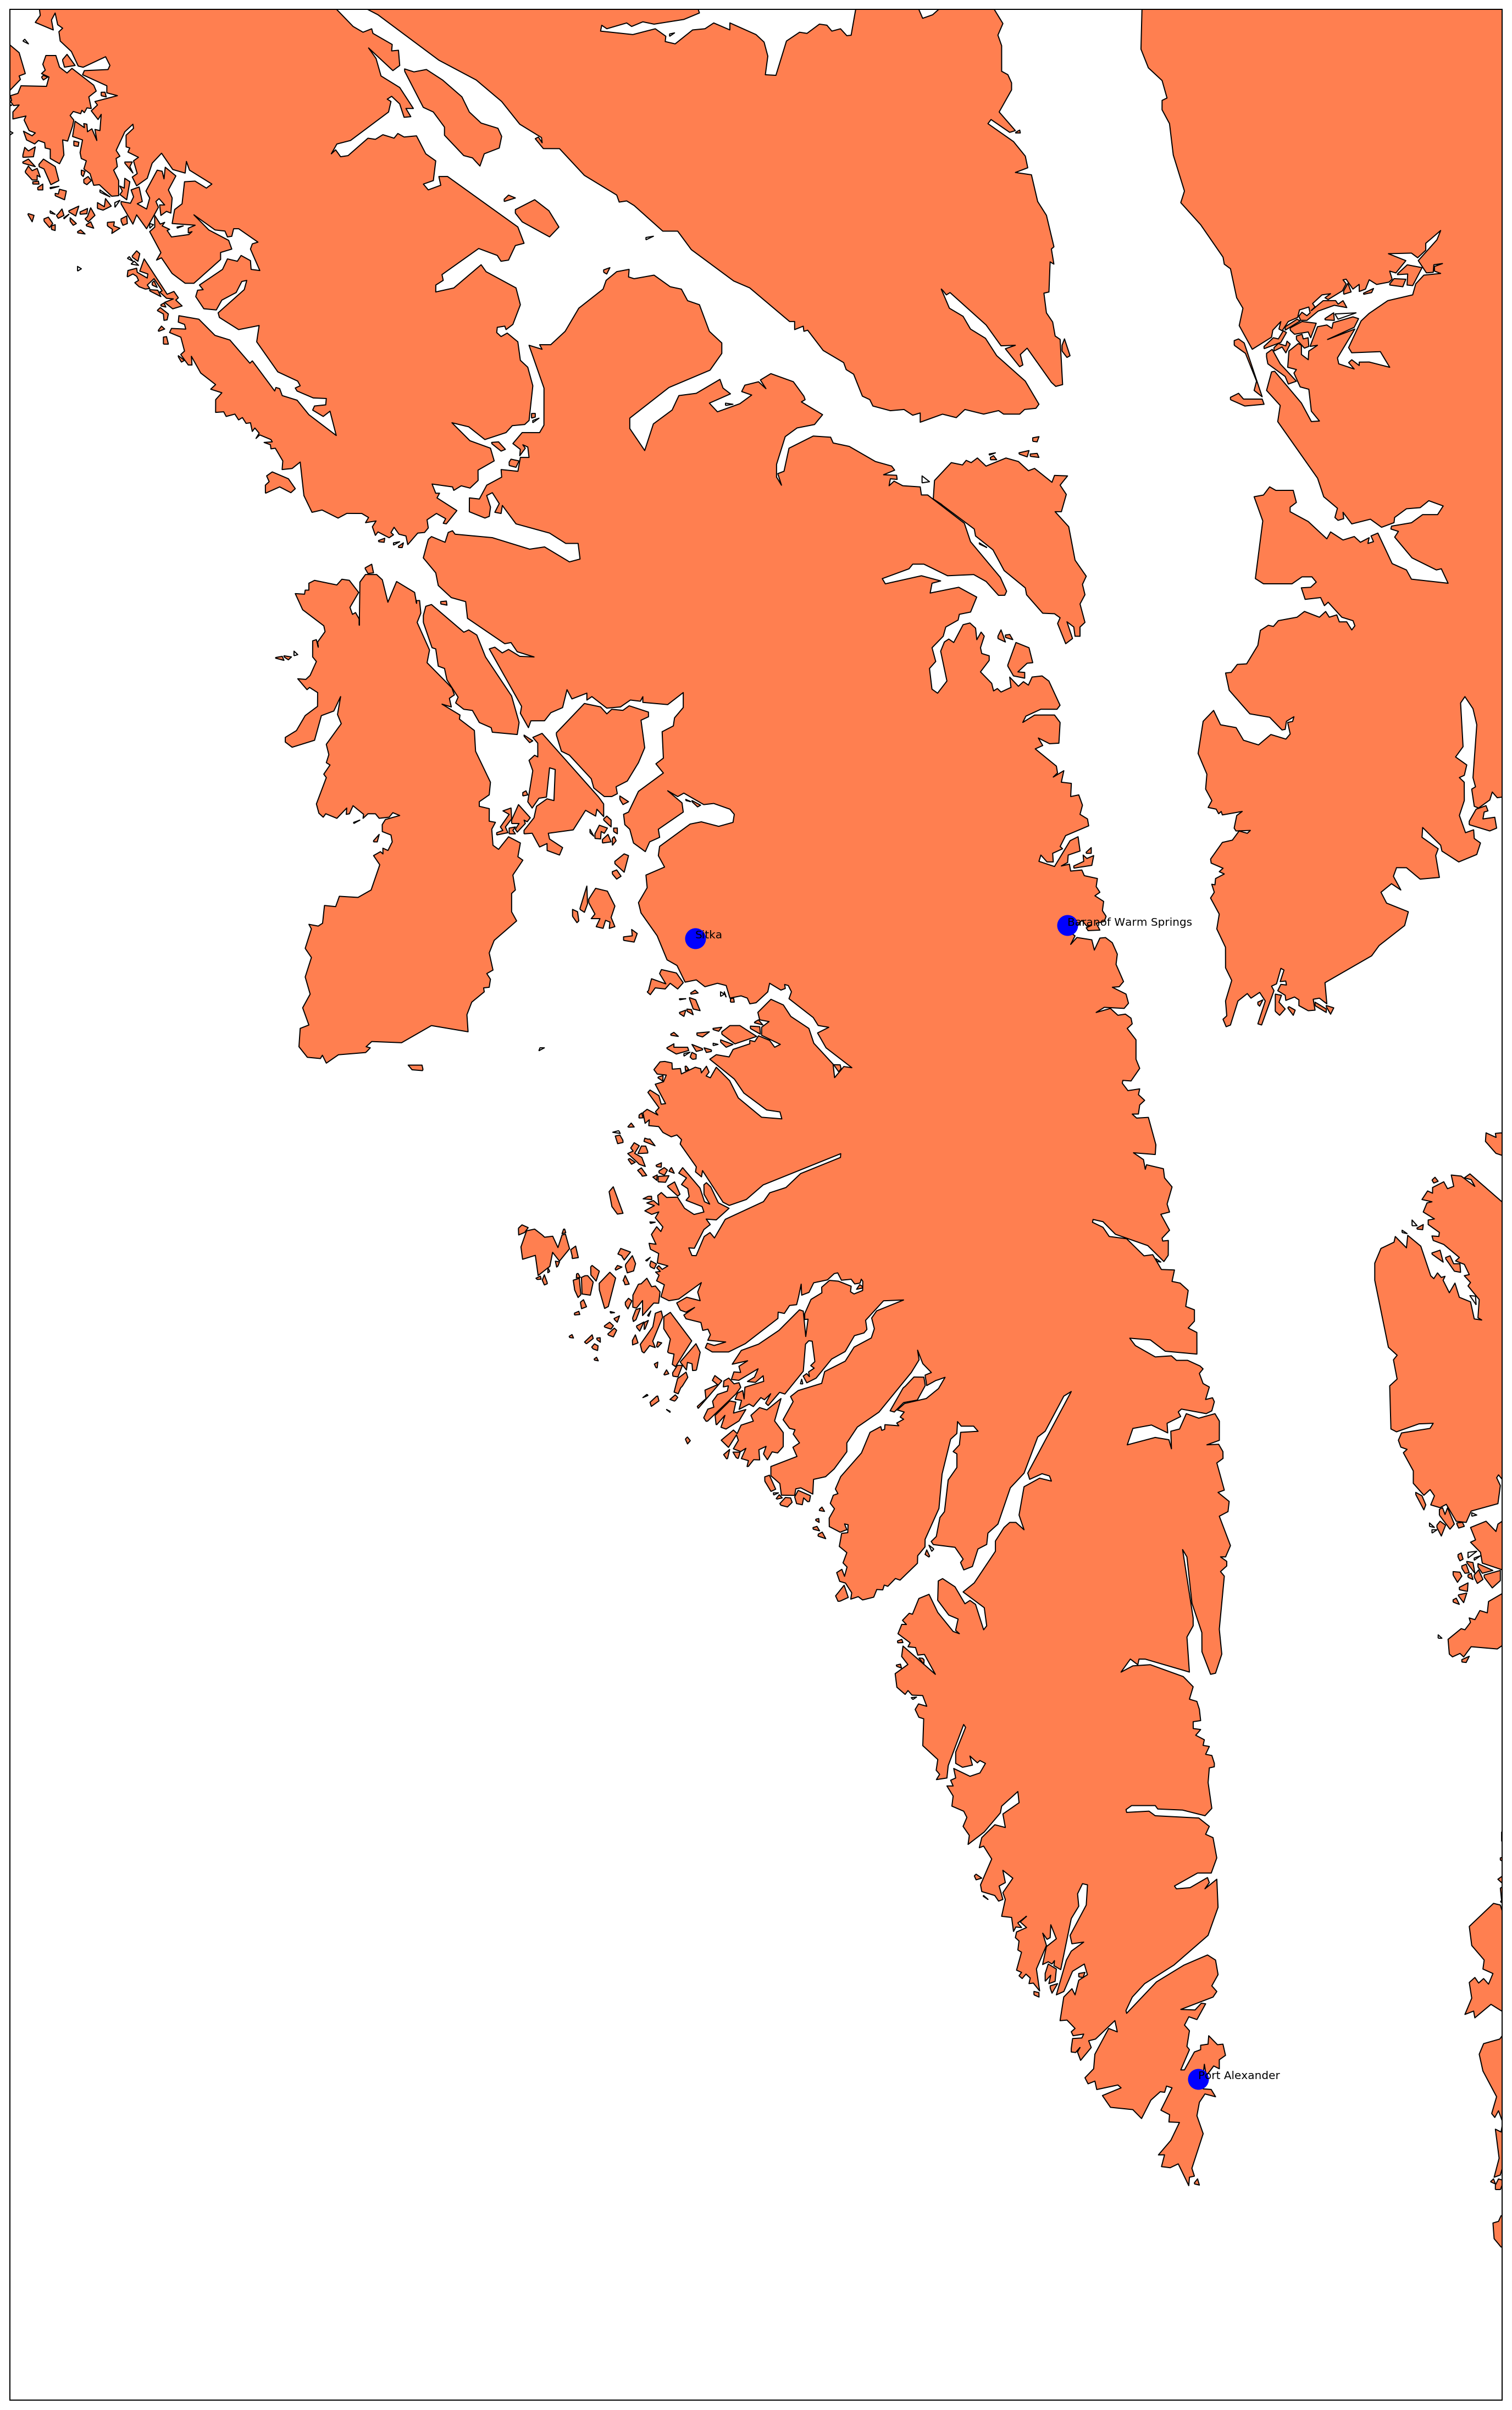

In [223]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
lons = [-135.3318, -134.8331, -134.6572]
lats = [57.0799, 57.0894, 56.2399]
x,y = map(lons, lats)
map.plot(x, y, 'bo', markersize=18)
 
labels = ['Sitka', 'Baranof Warm Springs', 'Port Alexander']
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt, ypt, label)
 
plt.show()


In [97]:
# test one of the variables in this coral colored map
label

In [ ]:
plt.figure(figsize=(11,11))

# define properties of markers and labels
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']
size_limits = [1, 100, 1000, 10000, 100000, 1000000]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 
#____________________________________________________________
map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 3)
map.drawstates(color='0.3')
#_____________________
# put airports on map
for index, (code, y,x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    isize = [i for i, val in enumerate(size_limits) if val < count_flights[code]]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+5, markeredgewidth = 1, color = colors[ind],
             markeredgecolor='k', label = labels[ind])
#_____________________________________________
# remove duplicate labels and set their order
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ('1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
             '10000 <.< 100000', '100000 <.< 1000000')
new_label = OrderedDict()
for key in key_order:
    new_label[key] = by_label[key]
plt.legend(new_label.values(), new_label.keys(), loc = 1, prop= {'size':11},
           title='Number of flights per year', frameon = True, framealpha = 1)
plt.show()

In [65]:
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']
size_limits = [1, 100, 1000, 10000, 100000, 1000000]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 
#____________________________________________________________

In [66]:
labels

['1 <.< 100',
 '100 <.< 1000',
 '1000 <.< 10000',
 '10000 <.< 100000',
 '100000 <.< 1000000']

In [ ]:
for index, (code, y,x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    isize = [i for i, val in enumerate(size_limits) if val < count_flights[code]]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+5, markeredgewidth = 1, color = colors[ind],
             markeredgecolor='k', label = labels[ind])